In [13]:
import pickle as pkl

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [15]:
with open('RSA_BC.pkl', 'rb') as f :
    a = pkl.load(f)

In [16]:
l = list(a.keys())
for k in l:
    k_ =  k.split('.pkl')[0]
    a[k_] =  a[k]
    a.pop(k)

In [19]:
a.keys()

dict_keys(['hidden_decay_k-1_m3', 'hidden_lstm_k-1_m3', 'hidden_onlstm_k-1_m2', 'hidden_onlstm_k-1_m3', 'hidden_gru_k-1_m1', 'hidden_onlstm_k0_m1', 'hidden_gru_k0_m2', 'hidden_onlstm_k-1_m4', 'hidden_lstm_k-1_m1', 'hidden_gru_k0_m3', 'hidden_gru_k0_m5', 'hidden_lstm_k0_m5', 'hidden_gru_k-1_m3', 'hidden_lstm_k0_m2', 'hidden_decay_k0_m1', 'hidden_decay_k0_m3', 'hidden_lstm_k-1_m4', 'hidden_onlstm_k0_m5', 'hidden_lstm_k0_m1', 'hidden_lstm_k-1_m5', 'hidden_onlstm_k0_m2', 'hidden_decay_k0_m2', 'hidden_lstm_k-1_m2', 'hidden_gru_k0_m1', 'hidden_gru_k-1_m4', 'hidden_decay_k-1_m4', 'hidden_onlstm_k-1_m5', 'hidden_decay_k0_m5', 'hidden_decay_k0_m4', 'hidden_gru_k0_m4', 'hidden_lstm_k0_m3', 'hidden_onlstm_k-1_m1', 'hidden_onlstm_k0_m4', 'hidden_decay_k-1_m5', 'hidden_lstm_k0_m4', 'hidden_gru_k-1_m2', 'hidden_decay_k-1_m1', 'hidden_decay_k-1_m2', 'hidden_gru_k-1_m5', 'hidden_onlstm_k0_m3'])

In [20]:
key = {
    'decay': 'DRNN', 
    'onlstm': 'ONLSTM', 
    'lstm': 'LSTM', 
    'gru': 'GRU', 
    'k-1': 'K-1', 
    'k0': 'K0', 
    'K0': 'K0',
    'K-1':'K-1',
    'DRNN':'DRNN', 
    'LSTM':'LSTM', 
    'ONLSTM':'ONLSTM', 
    'GRU':'GRU'
}

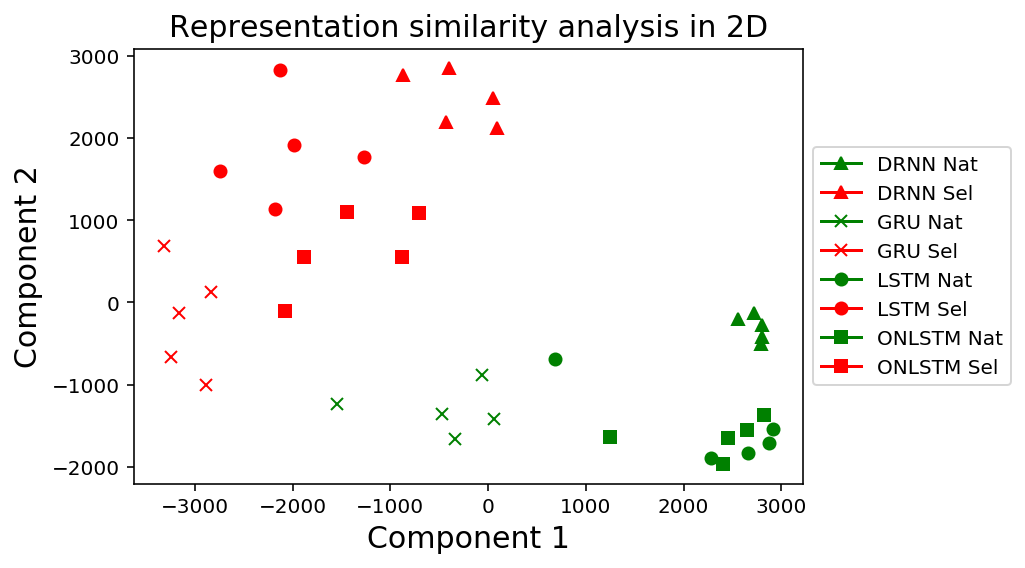

In [21]:
exist={}
for k in sorted(a.keys()):
    model = key[k.split('_')[1]]
    config = key[k.split('_')[2]]
    
    if model =='LSTM':
        m='o'
    elif model =='ONLSTM':
        m='s'
    elif model =='GRU':
        m='x'
    else:
        m='^'

    if config == 'K0':
        config = "Sel"
        c = 'r'
    elif config =='K-1':
        c = 'g'
        config = "Nat"
        
    leg = model + " "+ config
    if leg in exist:
        plt.plot([a[k][0]], [a[k][1]], color=c, marker=m)
    else:
        plt.plot([a[k][0]], [a[k][1]], label = leg, color=c, marker=m)
        exist[leg]=True
    
plt.title('Representation similarity analysis in 2D', fontsize=15)
plt.xlabel('Component 1', fontsize=15)
plt.ylabel('Component 2', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()